In [1]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

from mlxtend.plotting import plot_decision_regions

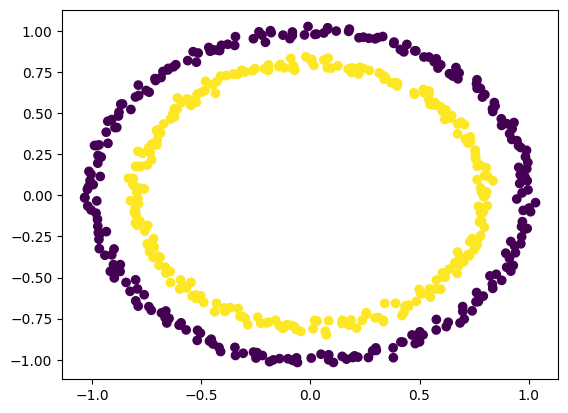

In [2]:
X,Y = make_circles(n_samples=500, noise=0.02)

plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [3]:
model1 = Sequential([
    Dense(2, activation="relu", input_dim=2),
    Dense(2, activation="relu"),
    Dense(1, activation="sigmoid")
])

model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history1 = model1.fit(X, Y, epochs=200, validation_split=0.2, verbose=False)

In [4]:
model2 = Sequential([
    Dense(2, activation="relu", input_dim=2),
    BatchNormalization(),
    Dense(2, activation="relu"),
    BatchNormalization(),
    Dense(1, activation="sigmoid")
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 2)                 6         
                                                                 
 batch_normalization (BatchN  (None, 2)                8         
 ormalization)                                                   
                                                                 
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 batch_normalization_1 (Batc  (None, 2)                8         
 hNormalization)                                                 
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 31
Trainable params: 23
Non-trainable pa

In [5]:
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

history2 = model2.fit(X, Y, epochs=200, validation_split=0.2, verbose=False)

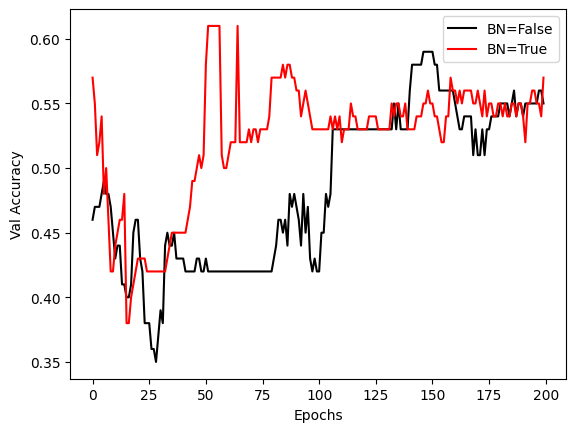

In [6]:
plt.plot(history1.history["val_accuracy"], color="black", label="BN=False")
plt.plot(history2.history["val_accuracy"], color="red", label="BN=True")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

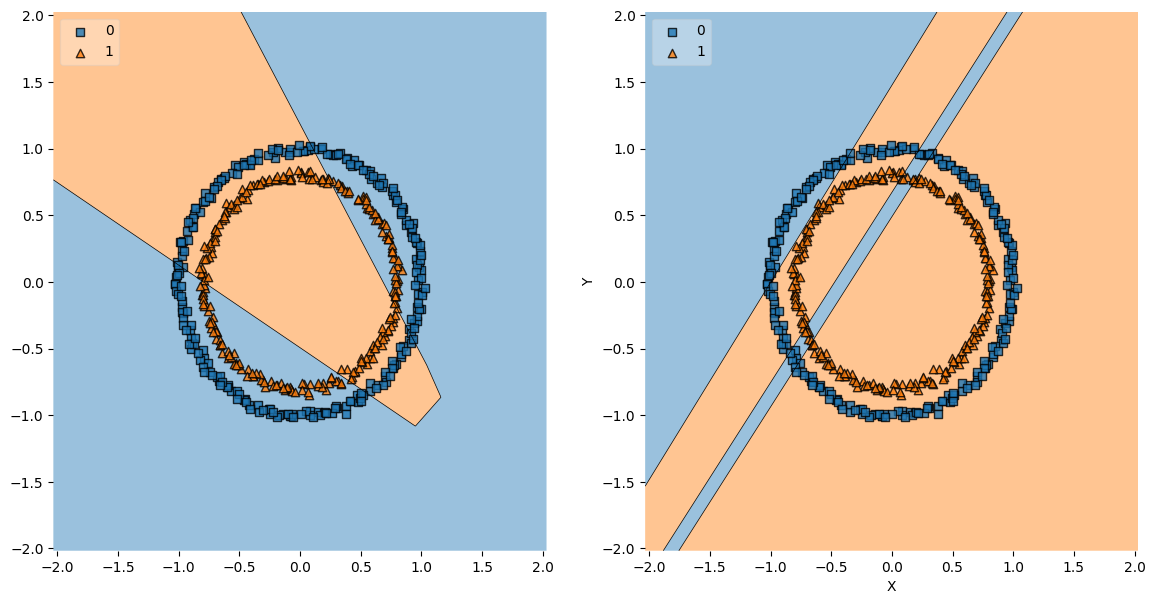

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

plot_decision_regions(X, Y.astype("int"), clf=model1, legend=2, ax=axs[0])
plot_decision_regions(X, Y.astype("int"), clf=model2, legend=2, ax=axs[1])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()